# Wand Binds to ImageMagick

[Wand](https://docs.wand-py.org/) is a `ctypes`-based [📖 [docs](https://docs.python.org/3/library/ctypes.html#module-ctypes)] simple [ImageMagick](http://www.imagemagick.org/) binding for Python.

## Drawing Text for an Image

We are going to draw text for an image, following these steps:

1. generate an image with a background
2. draw a transparent background for a title
3. draw the title text

## 1. Generate an Image with a Background

We are going to construct `Image` with `background` [📖 [docs](https://docs.wand-py.org/en/0.6.2/wand/image.html#wand.image.Image)]:

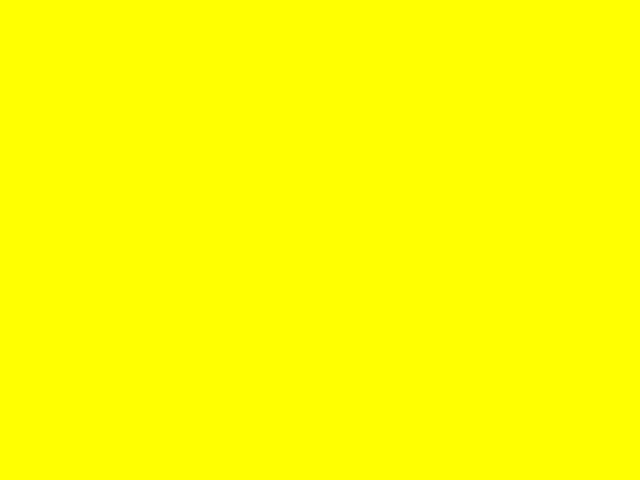

In [1]:
from IPython import display
from wand.color import Color
from wand.image import Image

w, h = 640, 480
output_filename = f'./images/wand_02_background_{w}x{h}.png'

with Color('#ff0') as background_color:
    with Image(width=w, height=h, background=background_color) as img:
        img.save(filename=output_filename)

display.Image(filename=output_filename)

## 2. Draw a Transparent Background for a Title

Draw with `fill_opacity` [📖 [docs](https://docs.wand-py.org/en/0.6.2/wand/drawing.html#wand.drawing.Drawing.fill_opacity)] to see a transparent background:

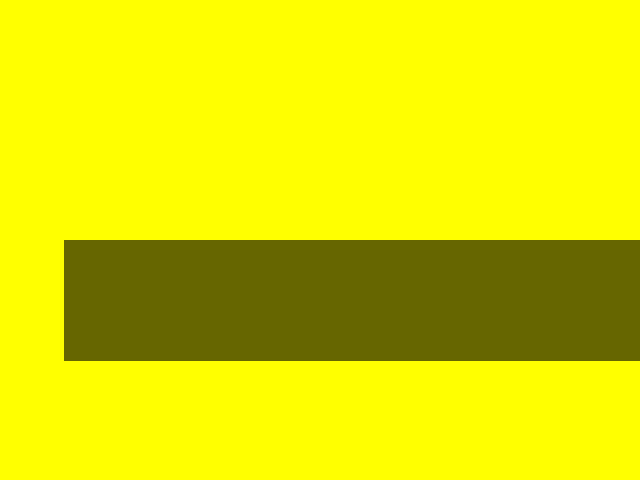

In [2]:
from wand.drawing import Drawing

output_filename = f'./images/wand_02_rectangle_{w}x{h}.png'
x, y, b = 64, 240, 360

with Drawing() as draw:
    draw.fill_color = Color('#000')
    draw.fill_opacity = 0.6
    draw.rectangle(left=x, top=y, right=w, bottom=b)

    with Image(filename='./images/wand_02_background_640x480.png') as original:
        with original.clone() as clone:
            draw(clone)
            clone.save(filename=output_filename)

display.Image(filename=output_filename)

## 3. Draw the Title Text

The [Wand documentation](https://docs.wand-py.org/en/0.6.2/wand/font.html) strongly suggests that it uses TrueType or the more modern [OpenType](https://en.wikipedia.org/wiki/OpenType) fonts:

>Font is an object which takes the `path` of font file, `size`, `color`, and whether to use `antialias`ing.

In the example below, we will use [Landasans Font](https://www.fontspace.com/landasans-font-f46854) by Mantra Aksara:

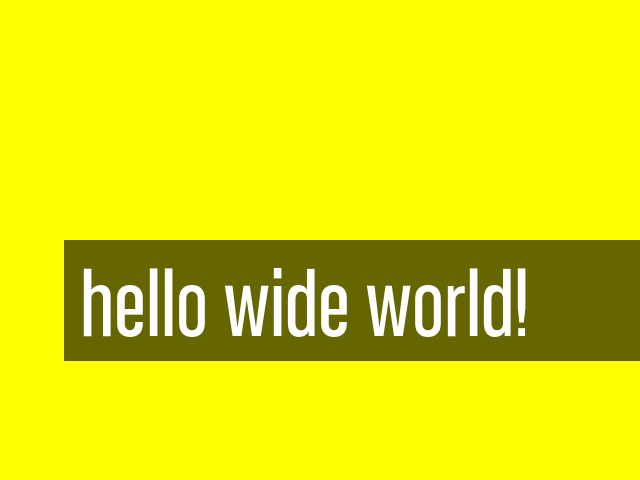

In [3]:
output_filename = f'./images/wand_02_font_{w}x{h}.png'

with Drawing() as draw:
    draw.fill_color = Color('#fff')
    draw.font = './open-type-fonts/landasans-font/LandasansMedium-ALJ6m.otf'
    draw.font_size = 96
    draw.text(x + 16, y + 96, 'hello wide world!')

    with Image(filename='./images/wand_02_rectangle_640x480.png') as original:
        with original.clone() as clone:
            draw(clone)
            clone.save(filename=output_filename)

display.Image(filename=output_filename)

## Bonus: `Drawing().get_font_metrics()`

The ImageMagick `FontMetrics` object [📖 [docs](https://docs.wand-py.org/en/latest/wand/drawing.html#wand.drawing.FontMetrics)] is returned by calling `Drawing().get_font_metrics()` with Wand:

In [4]:
help(Drawing.get_font_metrics)

Help on function get_font_metrics in module wand.drawing:

get_font_metrics(self, image, text, multiline=False)
    Queries font metrics from the given ``text``.
    
    :param image: the image to be drawn
    :type image: :class:`~wand.image.BaseImage`
    :param text: the text string for get font metrics.
    :type text: :class:`basestring`
    :param multiline: text is multiline or not
    :type multiline: `boolean`



The previous drawn text is left aligned with padding added. With the `text_width` property of `FontMetrics` we can right-align with padding:

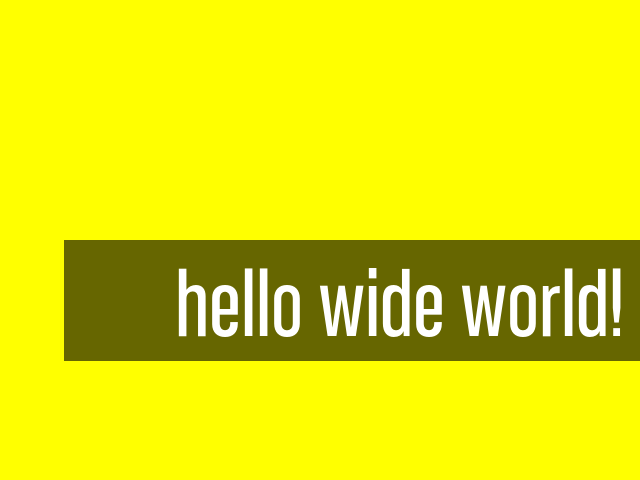

In [5]:
output_filename = f'./images/wand_02_font_right_{w}x{h}.png'
text = 'hello wide world!'

with Drawing() as draw:
    draw.fill_color = Color('#fff')
    draw.font = './open-type-fonts/landasans-font/LandasansMedium-ALJ6m.otf'
    draw.font_size = 96

    with Image(filename='./images/wand_02_rectangle_640x480.png') as original:
        with original.clone() as clone:
            font_metrics = draw.get_font_metrics(image=clone, text=text) 
            text_width = int(font_metrics.text_width)
            x = w - text_width - 16

            draw.text(x, y + 96, text)
            draw(clone)
            clone.save(filename=output_filename)

display.Image(filename=output_filename)